<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/3_1-3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Linear Regression

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
c = torch.zeros(n)
t = time.time()

for i in range(n):
  c[i] = a[i] + b[i]
print(f"time taken = {time.time() - t : .5f} sec")

time taken =  0.09847 sec


In [ ]:
t = time.time()
d = a+b
print(f"time taken = {time.time() - t : .5f} sec")

time taken =  0.00166 sec


In [ ]:
# Normal distribution
def normal(x, mu, sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 8,4
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [ ]:
params = [(0, 1), (0, 2), (3, 1)]

In [ ]:
params[0][1]

1

In [ ]:
help(plt.legend)

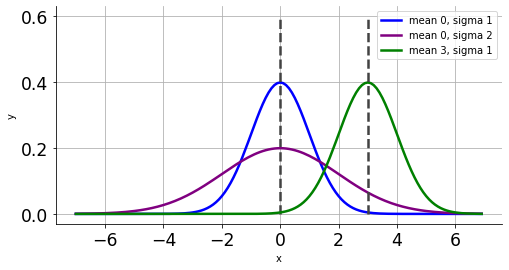

In [ ]:
x = np.arange(-7., 7., 0.1)

params = [(0, 1), (0, 2), (3, 1)] # List of tuples containing mu and sigma

plt.plot(x, normal(x, 0, 1), label = "mean 0, sigma 1", color = 'blue')
plt.vlines(x = 0, ymin=0, ymax=0.6, linestyles="dashed")
plt.plot(x, normal(x, 0, 2), label = "mean 0, sigma 2", color = 'purple')
plt.plot(x, normal(x, 3, 1), label = "mean 3, sigma 1", color = 'green')
plt.vlines(x = 3, ymin=0, ymax=0.6, linestyles='dashed')

plt.xlabel("x"), plt.ylabel("y")
plt.grid()
plt.legend();

# 3.2

In [8]:
print(__name__) # Main is starting point of execution

__main__


In [11]:
a = 5
print(type(a).__name__)

int


In [17]:
class Person():
  pass

In [20]:
p = Person()
print(type(p).__name__)
print(type(p))

Person
<class '__main__.Person'>


In [22]:
def some_func(self):
  # To be added to class Person
  # after it has been instatiated
  print("Hi there, this is some func, signing off!")

In [23]:
some_func.__name__

'some_func'

In [27]:
some_func

<function __main__.some_func(self)>

In [25]:
setattr(Person, some_func.__name__, some_func)
# Now some_func is availabe for the class Person

In [26]:
p.some_func()

Hi there, this is some func, signing off!


In [1]:
import time
import numpy as np
import torch
from torch import nn

In [10]:
help(setattr)

Help on built-in function setattr in module builtins:

setattr(obj, name, value, /)
    Sets the named attribute on the given object to the specified value.
    
    setattr(x, 'y', v) is equivalent to ``x.y = v''



In [8]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [9]:
class A:
  def __init__(self):
    self.b = 1

In [29]:
a = A()

In [28]:
#@add_to_class(A)
def do(self):
  print("Class Attribute b is : ", self.b)

do = (add_to_class(A))(do)

In [30]:
a.do()

Class Attribute b is :  1


In [43]:
help(NotImplemented)

Help on NotImplementedType object:

class NotImplementedType(object)
 |  Methods defined here:
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [40]:
class BaseClass:
  def hello(self):
    raise NotImplemented

In [42]:
a1 = BaseClass()
a1.hello()

TypeError: ignored

In [50]:
1 is not 2

True

In [51]:
1 not in [3, 4, 5]

True

In [52]:
help(hasattr)

Help on built-in function hasattr in module builtins:

hasattr(obj, name, /)
    Return whether the object has an attribute with the given name.
    
    This is done by calling getattr(obj, name) and catching AttributeError.



In [53]:
class Person:
  def __init__(self, a, b, c):
    self.a = a
    self.b = b
    self.c = c

In [54]:
p = Person(1, 2, 3)

In [55]:
hasattr(p, 'd')

False

In [58]:
hasattr(p, 'a')

True

In [3]:
import inspect

In [11]:
class HyperParameters():
  def save_hyperparameters(self, ignore=[]):
    # save function arguments into class attributes
    frame = inspect.currentframe().f_back
    _, _, _, local_vars = inspect.getargvalues(frame)
    self.hparams = {k:v for k, v in local_vars.items() if k not in set(ignore+['self']) and not k.startswith('_')}
    for k, v in self.hparams.items():
      setattr(self, k, v)

In [12]:
class B(HyperParameters):
  def __init__(self, a, b, c):
    self.save_hyperparameters(ignore=['c'])
    print("self.a = ", self.a, "self.b = ", self.b)
    print("There is no self.c = ", not hasattr(self, 'c'))

b = B(1, 2, 3)

self.a =  1 self.b =  2
There is no self.c =  True


In [14]:
import collections

In [ ]:
class ProgressBoard(HyperParameters):
  #plot data point in animation
  def __init__(self, x_label=None, y_label=None, xlim=None, ylim=None, xscale='linear', 
               yscale='linear', ls = ['-', '--', '-.', ':'], colors=['C0', 'C1', "C2", 'C3'],
               fig=None, axes=None, figsize=(3.5, 2.5), display=True):
    self.save_hyperparameters()

  def draw(self, x, y, label, every_n=1):
    Point = collections.namedtuple("Point", ['x', 'y'])
    if not hasattr(self, 'raw_points'):
      self.raw_points = collections.OrderedDict()
      self.data = collections.OrderedDict()
    if label not in self.raw_points:
      self.raw_points[label] = []
      self.data[label] = []
    points = self.raw_points[label]
    line = self.data[label]
    points.append(Point(x, y))

    if len(points) != every_n:
      return
    mean = lambda x: sum(x) / len(x)
    line.append(Point(mean([p.x for p in points]),
                      mean([p.y for p in points])))
    points.clear()
    if not self.display:
      return
    


# Dimag kharab ho rha hai.. so fresh **start**

In [ ]:
!pip install d2l

In [ ]:
!pip install --upgrade d2l==1.0.0a0

In [ ]:
!pip install matplotlib_inline

In [3]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
board = d2l.ProgressBoard('x')

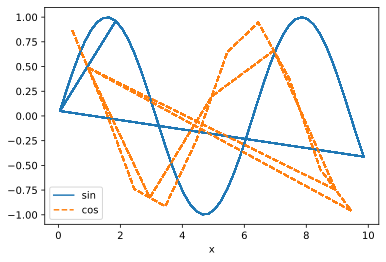

In [8]:
for x in np.arange(0, 10, 0.1):
  board.draw(x, np.sin(x), 'sin', every_n=2)
  board.draw(x, np.cos(x), 'cos', every_n=20)